# Spam Email detection Baseline Models
Prepared By Deepa Francis<br>
For BrainStation<br>
On July 31, 2023

# Table of Contents
[1. Configuring Resources](#cr) <br>
- [1.1. Set up Libraries](#sl) <br>
- [1.2. Load Data](#ld) <br>
- [1.3. Summary Satistics](#ss) <br>

[2. Logistic Regression](#lr) <br>
- [2.1. Random Search](#rslr) <br>
- [2.2. Grid Search](#gslr) <br>

[3. PCA](#pca) <br>
- [3.1. Random Search](#rspca) <br>
- [3.2. Grid Search](#gspca) <br>

[4. SVM](#svm) <br>
- [4.1. Random Search](#rssvm) <br>
- [4.2. Grid Search](#gssvm) <br>

[5. Random Forest](#rf) <br>
- [5.1. Random Search](#rsrf) <br>
- [5.2. Grid Search](#gsrf) <br>

[6.Naive Bayes](#nb) <br>
- [6.1. Random Search](#rsnb) <br>
- [6.2. Grid Search](#gsnb) <br>

[7. XGBoost](#xgb) <br>
- [7.1. Random Search](#rsxgb) <br>
- [7.2. Grid Search](#gsxgb) <br>

[8. Model Score Comparison](#msc) <br>
[9. Best Model](#bm) <br>
- [9.1. Confusion Matrix](#cm) <br>
- [9.2. Probability Threshold](#pt) <br>
- [9.3. AUC-ROC](#ar) <br>

<a id = "cr"></a>
## 1. Configuring Resources

A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.
Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is a necessity for many reasons.
Here, we are going to develop 6 baseline models for comparison and we will explore how hyperparameter optimization is used to find the best tuning parameter. Further, we use grid search for fine tuning these parameters.

<a id = "sl"></a>
### 1.1. Setting up Libraries

In [82]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# display all columns in dataframe
pd.set_option('display.max_columns', None)

<a id = "ld"></a>
### 1.2. Load Data

In [30]:
# Load the data
X_train = pd.read_csv('X_train.csv') 
X_test = pd.read_csv('X_test.csv') 
X_validation = pd.read_csv('X_validation.csv') 

y_train = pd.read_csv('y_train.csv') 
y_test = pd.read_csv('y_test.csv') 
y_validation = pd.read_csv('y_validation.csv') 

In [31]:
# Check the sahpes
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_validation is {X_validation.shape}')

The shape of X_train is (22400, 228)
The shape of X_test is (12000, 228)
The shape of X_validation is (5600, 228)


Check for any null values

In [32]:
X_train.isna().sum().sum()

0

In [33]:
X_test.isna().sum().sum()

0

In [34]:
X_validation.isna().sum().sum()

0

<a id = "ss"></a>
### 1.3. Summary Statistics

In [35]:
# Summary statistics
X_train.describe()

,subject_Word_Count_clipped,message_Word_Count_clipped,email_from_hash_0,email_from_hash_1,email_from_hash_2,email_from_hash_3,email_from_hash_4,email_from_hash_5,email_from_hash_6,email_from_hash_7,email_from_hash_8,email_from_hash_9,email_from_hash_10,email_from_hash_11,email_from_hash_12,email_from_hash_13,email_from_hash_14,email_from_hash_15,email_from_hash_16,email_from_hash_17,email_from_hash_18,email_from_hash_19,email_from_hash_20,email_from_hash_21,email_from_hash_22,email_from_hash_23,email_from_hash_24,email_from_hash_25,email_from_hash_26,email_from_hash_27,email_from_hash_28,email_from_hash_29,email_from_hash_30,email_from_hash_31,email_from_hash_32,email_from_hash_33,email_from_hash_34,email_from_hash_35,email_from_hash_36,email_from_hash_37,email_from_hash_38,email_from_hash_39,email_from_hash_40,email_from_hash_41,email_from_hash_42,email_from_hash_43,email_from_hash_44,email_from_hash_45,email_from_hash_46,email_from_hash_47,email_from_hash_48,email_from_hash_49,email_from_hash_50,email_from_hash_51,email_from_hash_52,email_from_hash_53,email_from_hash_54,email_from_hash_55,email_from_hash_56,email_from_hash_57,email_from_hash_58,email_from_hash_59,email_from_hash_60,email_from_hash_61,email_from_hash_62,email_from_hash_63,email_from_hash_64,email_from_hash_65,email_from_hash_66,email_from_hash_67,email_from_hash_68,email_from_hash_69,host_transform__from_host_Others,host_transform__from_host_gmail,host_transform__from_host_gmx,host_transform__from_host_hotmail,host_transform__from_host_mail,host_transform__from_host_yahoo,domain_transform__from_domain_Others,domain_transform__from_domain_ca,domain_transform__from_domain_com,domain_transform__from_domain_edu,domain_transform__from_domain_net,domain_transform__from_domain_org,domain_transform__from_domain_uk,prominent_topic_0,prominent_topic_1,prominent_topic_2,prominent_topic_3,prominent_topic_4,subject_alert,subject_best,subject_branch,subject_bush,subject_cnn,subject_commit,subject_data,subject_discount,subject_dont,subject_file,subject_function,subject_help,subject_iphealth,subject_make,subject_medic,subject_mhln,subject_need,subject_new,subject_news,subject_notif,subject_patch,subject_perl,subject_pill,subject_price,subject_problem,subject_question,subject_rev,subject_samba,subject_ship,subject_softwar,subject_stock,subject_sugar,subject_svn,subject_test,subject_time,subject_use,subject_viagra,subject_want,message_ad,message_altern,message_avail,message_back,message_base,message_best,message_bit,message_boundari,message_ca,message_call,message_chang,message_check,message_click,message_code,message_come,message_contact,message_could,message_current,message_data,message_day,message_de,message_dear,message_en,message_end,message_even,message_file,message_find,message_first,message_follow,message_free,message_gener,message_gif,message_give,message_go,message_good,message_guid,message_help,message_hi,message_high,message_id,message_imag,message_inform,message_iso,message_know,message_last,message_list,message_look,message_mailman,message_make,message_mani,message_math,message_may,message_messag,message_minim,message_much,message_na,message_name,message_need,message_net,message_new,message_news,message_one,message_peopl,message_pleas,message_post,message_price,message_printabl,message_project,message_provid,message_read,message_receiv,message_reproduc,message_right,message_run,message_said,message_say,message_see,message_self,message_servic,message_set,message_st,message_system,message_take,message_th,message_thank,message_think,message_time,message_tri,message_two,message_type,message_us,message_use,message_version,message_want,message_way,message_well,message_work,message_world,message_wrote,message_ye
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.00

We have a mix of numerical features and binary categorical features. The choice of feature scaling method depends on the nature of the features and the algorithm we plan to use.<br>

- For numerical features, it's often a good idea to scale them to a similar range to avoid issues caused by different scales. Two common scalers used for numerical features are Min-Max scaling and Standardization (Z-score scaling).<br>
- For binary categorical features, scaling is not necessary since they already have a fixed range (0 or 1).<br>

For simplicity of coding, we choose a single scaling technique that can take care of both numerical and binary features, and that is MinMax scaling.<br>

MinMax scaling scales all the features to a fixed range, typically [0, 1]. It works for numerical features as well as binary features. For numerical features, it linearly scales the values to the specified range. For binary features, it maps the minimum value to 0 and the maximum value to 1.

<a id = "lr"></a>
## 2. Logistic Regression

Logistic Regression models the probability that an instance belongs to a certain class using the logistic (sigmoid) function, which maps the output to a value between 0 and 1. 
- The 'C' parameter in Logistic Regression is the inverse of regularization strength, where a smaller 'C' value indicates stronger regularization. Regularization helps prevent overfitting by adding a penalty for large coefficient values. 
- Optimizing 'C' involves finding the right balance: a smaller 'C' may simplify the model but could underfit, while a larger 'C' may lead to overfitting. The optimal 'C' value depends on the complexity of the data and is often determined using techniques like grid search or cross-validation.<br>
First, we are going to evaluate Logistic Regression model with default parameters.

In [36]:
# Define the steps for the Logistic Regression pipeline
my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression())
            ]
pipeline = Pipeline(my_pipeline)
pipeline.fit(X_train, y_train)
# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy is {train_accuracy*100:.2f}')
    
# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy is 95.96
Test accuracy is 90.27

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



<a id = "rslr"></a>
### 2.1. Random Search

Next, we are going to find the optimized c-values by looking at the train and validation accuracies for a range of c-values.

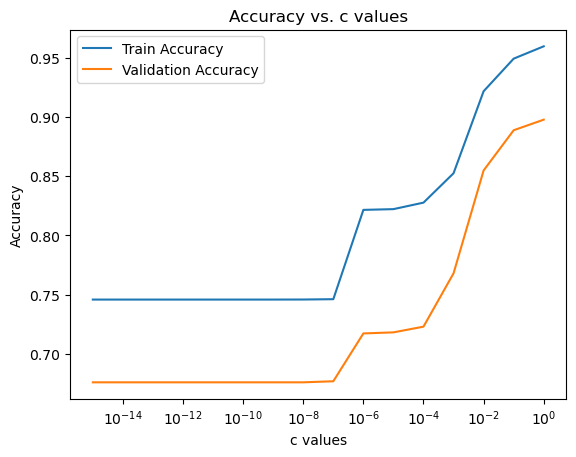

In [37]:
# Initialize lists to store c_values and accuracies
c_values = 10.**np.arange(-15,1)
train_scores = []
val_scores = []

for c in c_values:
    
#Define the steps for the Logistic Regression pipeline
    my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression(C=c))
                    ]
 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(c_values, train_scores, label='Train Accuracy')
plt.plot(c_values, val_scores, label='Validation Accuracy')
plt.xlabel('c values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. c values')
plt.xscale('log')
plt.legend()
plt.show()

Find the best c-value where the validation accuracy is atleast 75% and where the train and validation accuracies are the most closely matched.

In [38]:
# Find the indices where val_scores > 0.75
val_indices = np.where(np.array(val_scores) > 0.75)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_c_value = c_values[valid_indices]

print(f'The best c value is {best_c_value}')

The best c value is 0.1


Check the accuracies with the best c value obtained.

In [39]:
my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression(C=best_c_value))
                    ]
pipeline = Pipeline(my_pipeline)
pipeline.fit(X_train, y_train)
    
# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 94.92
The best validation accuracy is 88.88
The best test accuracy is 89.61

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



<a id = "gslr"></a>
### 2.2. Grid Search

Now we are going to perform grid search for fine tuning the c value.

In [40]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('logistic_regression', LogisticRegression())
])

# Step 2: Define hyperparameters for grid search
param_grid = {'logistic_regression__C': [0.009,0.0095,0.1,0.105,0.11],
    'logistic_regression__penalty': ['l1', 'l2']
}

# Step 3: Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_c_value = best_params['logistic_regression__C']
best_penalty = best_params['logistic_regression__penalty']

# Step 5: Fit the pipeline on the training data with the best hyperparameters
pipeline.set_params(logistic_regression__C=best_c_value, 
                    logistic_regression__penalty=best_penalty)
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
val_accuracy = pipeline.score(X_validation, y_validation)
test_accuracy = pipeline.score(X_test, y_test)

print(f'The best C value for Logistic Regression is {best_c_value}')
print(f'The best penalty for Logistic Regression is {best_penalty}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best C value for Logistic Regression is 0.11
The best penalty for Logistic Regression is l2

The train accuracy is 94.95
The cross validation accuracy is 94.66
The validation accuracy is 88.93
The test accuracy is 89.72

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [41]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

- The optimal hyperparameters were found to be a C value of 0.11 and an l2 penalty. The model achieved high accuracy on both the training set (94.95%) and the cross-validation set (94.66%), demonstrating its effectiveness in generalization. 
- However, a slightly lower accuracy was observed on the validation set (88.93%) and the test set (89.73%), indicating some overfitting. 
- Here we acknowledge the fact that there is data leakage while using grid search as the feature encoding was done outside the grid. This the reason of higher grid score when compared to validation accuracy score.
- The classification report shows that the model performed well in classifying both classes (0 and 1) with high precision, recall, and F1-score, resulting in an overall accuracy of 90% on the test set.

In [42]:
# Create arrays for Storing the scores
model = []
final_train_score =[]
final_crossval_score =[]
final_val_score =[]
final_test_score =[]
final_precision =[]
final_recall =[]
final_f1 =[]

# Append the scores
model.append('Log Reg')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

<a id = "pca"></a>
## 3. PCA

For dimensionality reduction using PCA, first we need to find the optimal number of principal components we need to select. We will do this by looking at the explained variance ratio. Lets plot cumulative explained variance against number of PCs to determine the optimal number of PCs required to have the best explained variance.

<a id = "rspca"></a>
### 3.1. Random Search

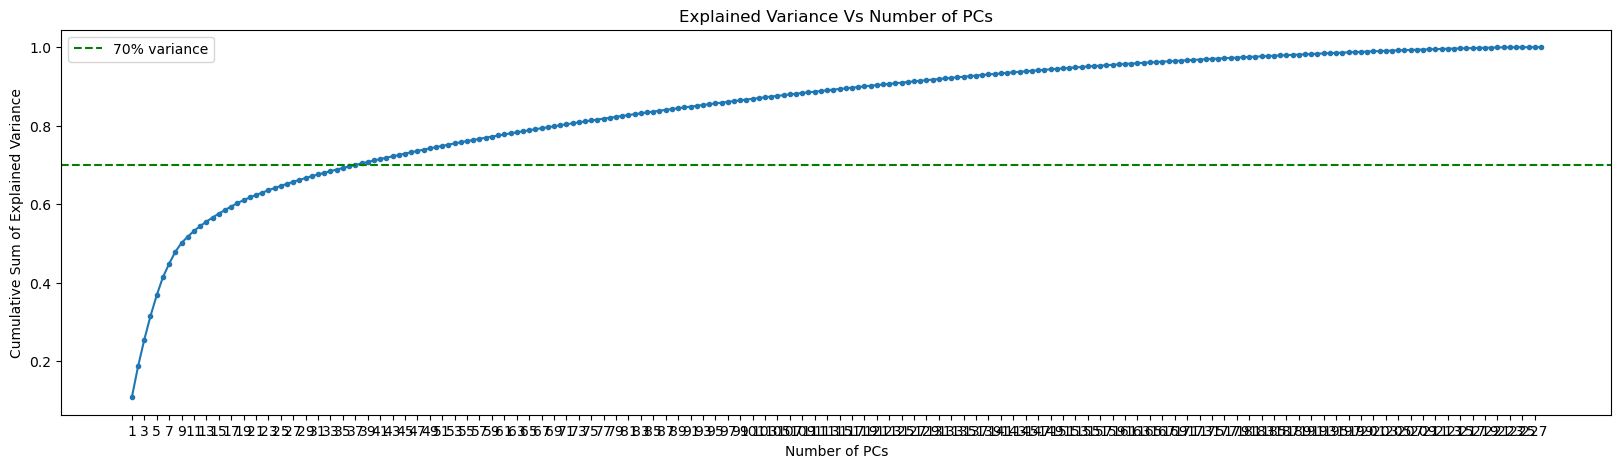

In [43]:
# Initiate PCA
my_PCA = PCA() 

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model
my_PCA.fit(X_train_scaled)

# Pull out the explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

# Plot out the cumulative sum graph

plt.figure(figsize=(20,5))
plt.plot(range(1,229), cumulative_sum, marker='.')
plt.title('Explained Variance Vs Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.axhline(0.7, label = '70% variance',color='g', linestyle='--')
plt.xticks(range(1,228,2))
plt.legend()
plt.show()

Optimze explained variance by plotting it over a range of values around the sharp edge in the above plot.

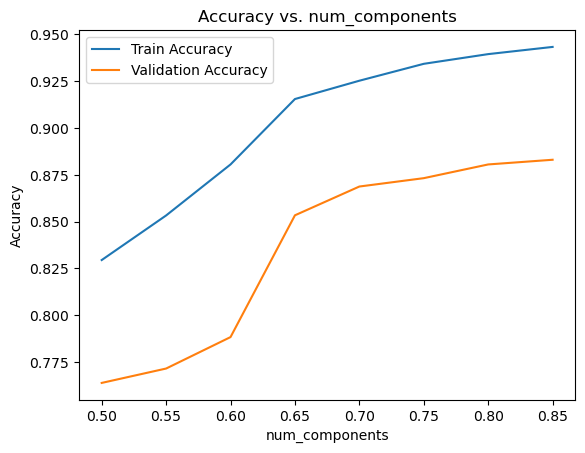

In [44]:
# Initialize lists to store num_components and accuracies
num_components = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
train_scores = []
val_scores = []

for n in num_components:
    
# Define the steps for the Logistic Regression pipeline
    my_pipeline = [('scaler', MinMaxScaler()),
                    ('pca', PCA(n_components=n)),  
                    ('logistic_regression', LogisticRegression(C=best_c_value))
                  ]
 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(num_components, train_scores, label='Train Accuracy')
plt.plot(num_components, val_scores, label='Validation Accuracy')
plt.xlabel('num_components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. num_components')
plt.legend()
plt.show()

Now choose the best explained variance where the train and validation accuracies comes the closest.

In [45]:
# Find the indices where val_scores > 0.7
val_indices = np.where(np.array(val_scores) > 0.70)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_n = num_components[valid_indices]

print(f'The best n compnents is {best_n}')

The best n compnents is 0.7


Calculate the scores with the besparameter values we have so far.

In [46]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('pca', PCA(n_components=best_n)), 
    ('logistic_regression', LogisticRegression(C=best_c_value)) 
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 92.52
The best validation accuracy is 86.88
The best test accuracy is 86.90

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6000
           1       0.88      0.85      0.87      6000

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



<a id = "gspca"></a>
### 3.2. Grid Search

Execute a grid search to further fine tune the hyperparameters.

In [47]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('pca', PCA()),  
    ('logistic_regression', LogisticRegression())
])

# Step 2: Define hyperparameters for grid search
param_grid = {
    'pca__n_components': [0.65,0.67,0.7,0.72,0.75],
    'logistic_regression__C': [0.09,0.1,0.105,0.11,0.115],
    'logistic_regression__penalty': ['l1', 'l2']
}

# Step 3: Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_n_components = best_params['pca__n_components']
best_c_value = best_params['logistic_regression__C']
best_penalty = best_params['logistic_regression__penalty']

# Step 5: Fit the pipeline on the training data with the best hyperparameters
pipeline.set_params(pca__n_components=best_n_components, 
                    logistic_regression__C=best_c_value, 
                    logistic_regression__penalty=best_penalty)
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
val_accuracy = pipeline.score(X_validation, y_validation)
test_accuracy = pipeline.score(X_test, y_test)

print(f'The best number of components for PCA is {best_n_components}')
print(f'The best C value for Logistic Regression is {best_c_value}')
print(f'The best penalty for Logistic Regression is {best_penalty}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))


The best number of components for PCA is 0.75
The best C value for Logistic Regression is 0.115
The best penalty for Logistic Regression is l2

The train accuracy is 93.45
The cross validation accuracy is 93.24
The validation accuracy is 87.27
The test accuracy is 87.95

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6000
           1       0.90      0.86      0.88      6000

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [48]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

- The report highlights the results of utilizing Principal Component Analysis (PCA) in combination with Logistic Regression for a classification task. 
- The optimal number of components for PCA was determined to be 0.75, and the best hyperparameters for Logistic Regression were found to be a C value of 0.115 with an l2 penalty. 
- The model achieved reasonably high accuracy on both the training set (93.45%) and the cross-validation set (93.24%), indicating good generalization capabilities. 
- However, there was a slight drop in accuracy on the validation set (87.27%) and the test set (87.95%), suggesting some level of overfitting. 
- Once again, we acknowledge the fact that there is data leakage while using grid search as the feature encoding was done outside the grid. This the reason of higher grid score when compared to validation accuracy score.
- The classification report demonstrates that the model performed well in classifying both classes (0 and 1) with balanced precision, recall, and F1-score, resulting in an overall accuracy of 88% on the test set.

In [49]:
# Append the scores
model.append('PCA LogReg')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

<a id = "svm"></a>
## 4. SVM

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. -It works by finding the optimal hyperplane that best separates data points of different classes in a high-dimensional feature space. 
- The 'C' parameter in SVM is a regularization parameter that balances the trade-off between maximizing the margin and minimizing classification errors. A smaller 'C' value allows a larger margin but may tolerate some misclassifications, while a larger 'C' value aims to classify all points correctly but may lead to a smaller margin. 
- The 'kernel' in SVM is a function that transforms the original feature space into a higher-dimensional space, allowing for non-linear classification boundaries. Common kernel functions include Linear, Polynomial, Radial Basis Function (RBF), and Sigmoid. 
- The choice of the optimal 'C' and kernel values significantly impacts the SVM's performance and is often determined through hyperparameter optimization techniques like grid search or random search. We are doing both methods here.

<a id = "rssvm"></a>
### 4.1. Random Search

We can take a look into the accuracies for a range of c values.

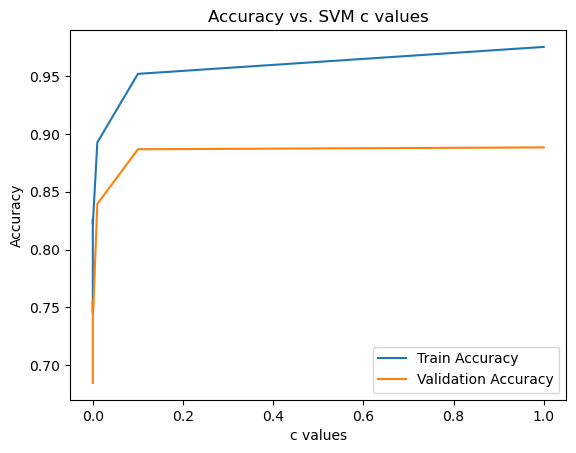

In [50]:
# Create arrays for storing hyperparameters and accuracies
svm_c = 10.**np.arange(-20,1)
train_scores = []
val_scores = []

for c in svm_c:
    
# Define the steps for the Logistic Regression pipeline
    my_pipeline = [('scaler', MinMaxScaler()),
                    ('pca', PCA(best_n_components)),  
                    ('svm', SVC(C=c,kernel='rbf'))
                  ]
 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(svm_c, train_scores, label='Train Accuracy')
plt.plot(svm_c, val_scores, label='Validation Accuracy')
plt.xlabel('c values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. SVM c values')
plt.legend()
plt.show()

Find the best c value where validation accuracy is higher and closest to the train accuracy to prevent overfiting.

In [51]:
# Find the indices where val_scores > 0.8
val_indices = np.where(np.array(val_scores) > 0.80)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_svm_c = svm_c[valid_indices]

best_svm_c

0.01

Score the model with the best c value for three kernel types: rbf, sigmoid, poly

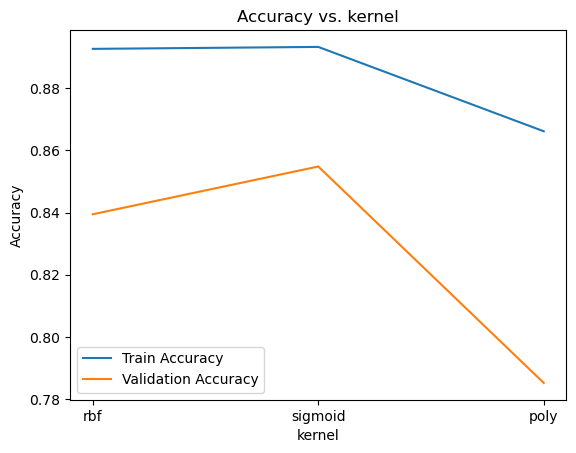

In [52]:
kernel = ['rbf', 'sigmoid', 'poly']
train_scores = []
val_scores = []

for k in kernel:
    
# Define the steps for the Logistic Regression pipeline
    my_pipeline = [('scaler', MinMaxScaler()),
                    ('pca', PCA(best_n_components)),  
                    ('svm', SVC(C=best_svm_c,kernel=k))
                  ]
 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(kernel, train_scores, label='Train Accuracy')
plt.plot(kernel, val_scores, label='Validation Accuracy')
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. kernel')
plt.legend()
plt.show()

Find the best kernel whose validation accuracy is higher and closest to the train accuracy.

In [53]:
# Find the indices where val_scores > 0.75
val_indices = np.where(np.array(val_scores) > 0.75)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_kernel = kernel[valid_indices]

best_kernel

'sigmoid'

In [54]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Step 1: Standardize the data
    ('pca', PCA(n_components=best_n)),  # Step 2: PCA for dimensionality reduction
    ('svm', SVC(C=best_svm_c,kernel=best_kernel))  # Step 3: SVM
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 88.01
The best validation accuracy is 84.36
The best test accuracy is 84.73

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6000
           1       0.84      0.86      0.85      6000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



<a id = "gssvm"></a>
### 4.2. Grid search

In [55]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA()),  
    ('svm', SVC())  
])

# Step 2: Define hyperparameters for grid search
param_grid = {
    'pca__n_components': [0.6,0.65,0.7,0.75,0.8,0.85],  
    'svm__C': [0.0095,0.009,0.01,0.0105,0.0115], 
    'svm__kernel': ['sigmoid', 'rbf', 'poly']
}

# Step 3: Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_n_components = best_params['pca__n_components']
best_svm_c = best_params['svm__C']
best_kernel = best_params['svm__kernel']

# Step 5: Fit the pipeline on the training data with the best hyperparameters
pipeline.set_params(pca__n_components=best_n_components,
                    svm__C=best_svm_c,
                    svm__kernel=best_kernel)
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
validation_accuracy = pipeline.score(X_validation, y_validation)
test_accuracy = pipeline.score(X_test, y_test)

print(f'The best number of components for PCA is {best_n_components}')
print(f'The best kernel for SVM is {best_kernel}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best number of components for PCA is 0.8
The best kernel for SVM is sigmoid

The train accuracy is 90.15
The cross validation accuracy is 89.68
The validation accuracy is 84.36
The test accuracy is 86.80

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      6000
           1       0.85      0.89      0.87      6000

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [56]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

The best number of components was determined to be 0.8. For classification, Support Vector Machine (SVM) was used with the sigmoid kernel, which is considered the best choice for this specific problem.

- The training accuracy achieved was 90.15%, indicating how well the model fit the training data. 
- The cross-validation accuracy, which measures generalization performance, was slightly lower at 89.68%. 
- The model's accuracy on a separate validation dataset was 84.36%, and on an unseen test dataset, it achieved an accuracy of 86.80%.
- The classification report provides additional insights into the model's performance for each class. The precision, recall, and F1-score are used to assess the model's ability to correctly identify instances of each class (0 and 1). <br>
Overall, the model shows good performance with an accuracy of 87% and balanced precision and recall for both classes.

In [57]:
# Append the scores
model.append('SVM')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

<a id = "rf"></a>
## 5. Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to make accurate predictions. In the context of spam email detection, using Random Forest can help improve the overall performance of the classification model. <br>
By optimizing the hyperparameters, n_estimators, and max_depth, we can fine-tune the Random Forest algorithm to achieve better results. Increasing the number of n_estimators allows the model to be more robust and capture complex patterns in the data, while tuning max_depth helps prevent overfitting and enhances generalization to new, unseen emails. 

<a id = "rsrf"></a>
### 5.1. Random search

Optimize n_estimators by comparing the accuracies over a range of values.

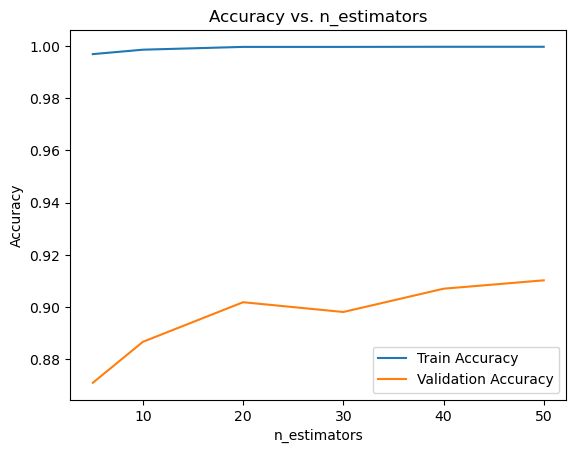

In [58]:
# Initialize lists to store hyperparameters and accuracies
nestimators = [5,10,20,30,40,50]
train_scores = []
val_scores = []

for n in nestimators:
    my_pipeline = [('model', RandomForestClassifier(n_estimators=n))
                    ] 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(nestimators, train_scores, label='Train Accuracy')
plt.plot(nestimators, val_scores, label='Validation Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.legend()
plt.show()

Choose the best n estimator values where the validation score id higher and closest ot the train accuracy.

In [59]:
# Find the indices where val_scores > 0.8
val_indices = np.where(np.array(val_scores) > 0.80)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_nestimators = nestimators[valid_indices]

best_nestimators

50

Optimize max_depth by comparing the accuracies over a range of values.

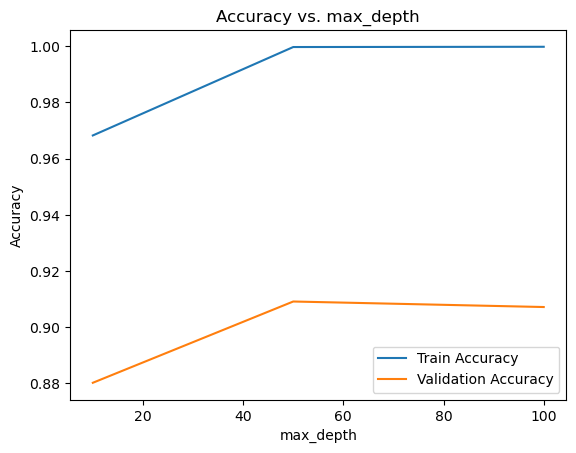

In [60]:
# Initialize lists to store hyperparameters and accuracies
max_depth = [None, 10, 50,100]
train_scores = []
val_scores = []

for d in max_depth:
    my_pipeline = [('model', RandomForestClassifier(n_estimators=best_nestimators, max_depth = d))
                    ] 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(max_depth, train_scores, label='Train Accuracy')
plt.plot(max_depth, val_scores, label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth')
plt.legend()
plt.show()

Choose the best max_depth value where the validation score id higher and closest ot the train accuracy.

In [61]:
# Find the indices where val_scores > 0.75
val_indices = np.where(np.array(val_scores) > 0.80)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_max_depth = max_depth[valid_indices]

best_max_depth

10

Score a model with the best hyperparameter values.

In [62]:
# Create the pipeline
pipeline = Pipeline([('model', RandomForestClassifier(n_estimators=n))
                    ] )
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 99.97
The best validation accuracy is 91.16
The best test accuracy is 91.45

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      6000
           1       0.92      0.91      0.91      6000

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



<a id = "gsrf"></a>
### 5.2. Grid search

Perform grid search for further fine tune the hyperparameters and view the result.

In [63]:
# Step 1: Define the Random Forest classifier
random_forest = RandomForestClassifier()

# Step 2: Define hyperparameters for grid search
param_grid = {
    'max_depth': [5,10,15,20],  
    'n_estimators': [40,45,50,55,60] 
}

# Step 3: Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']

# Step 5: Create and fit the final Random Forest classifier with the best hyperparameters
final_random_forest = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators)
final_random_forest.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = final_random_forest.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = final_random_forest.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
val_accuracy = final_random_forest.score(X_validation, y_validation)
test_accuracy = final_random_forest.score(X_test, y_test)

print(f'The best max_depth for Random Forest is {best_max_depth}')
print(f'The best n_estimators for Random Forest is {best_n_estimators}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))


The best max_depth for Random Forest is 20
The best n_estimators for Random Forest is 60

The train accuracy is 99.04
The cross validation accuracy is 97.75
The validation accuracy is 90.48
The test accuracy is 90.88

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6000
           1       0.89      0.93      0.91      6000

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [64]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

The Random Forest model achieved impressive performance with hyperparameter tuning. 
- The best max_depth value of 20 and n_estimators of 60 were identified through optimization. 
- The model demonstrated exceptional accuracy during training, reaching 99.12%. Additionally, cross-validation accuracy was also high at 97.73%, indicating good generalization. 
- The model performed well on unseen data, with a validation accuracy of 90.38% and a test accuracy of 91.24%. 
- The classification report shows balanced precision, recall, and f1-score for both classes, further highlighting the model's effectiveness in handling the classification task.

In [65]:
# Append the scores
model.append('Random Forest')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

<a id = "nb"></a>
## 6. Naive Bayes

Naive Bayes is a popular and simple probabilistic classification algorithm commonly used for spam email detection due to its efficiency and effectiveness. Hyperparameter tuning involves finding the best values for parameters like Laplace smoothing, which can enhance the model's ability to handle unseen data and reduce overfitting. 

<a id = "rsnb"></a>
### 6.1. Random search

Optimize alpha values by comparing the accuracies over a range of values.

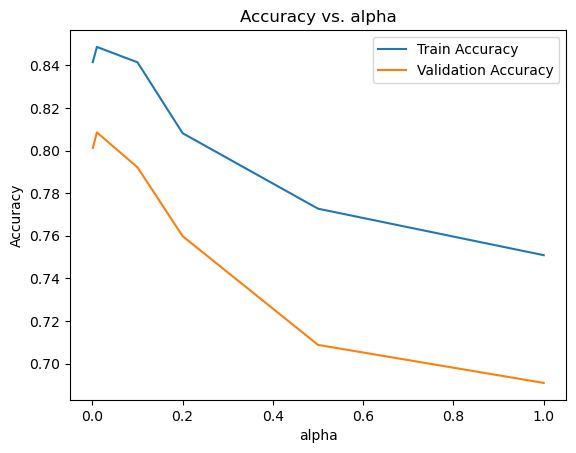

In [66]:
# Initialize lists to store hyperparameters and accuracies
alpha = [0.001,0.01,0.1,0.2,0.5,1]
train_scores = []
val_scores = []

for a in alpha:
    my_pipeline = [('normalize', MinMaxScaler()),
                    ('pca', PCA(best_n_components)),
                    ('naive_bayes', GaussianNB(var_smoothing = a))
                    ] 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(alpha, train_scores, label='Train Accuracy')
plt.plot(alpha, val_scores, label='Validation Accuracy')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. alpha')
plt.legend()
plt.show()

Choose the best alpha value where the validation score id higher and closest ot the train accuracy.

In [67]:
# Find the indices where val_scores > 0.60
val_indices = np.where(np.array(val_scores) > 0.60)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_alpha = alpha[valid_indices]

best_alpha

0.01

Score the model with the best hyperparameter values.

In [68]:
# Create the pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()),
                    ('pca', PCA(best_n_components)),
                    ('naive_bayes', GaussianNB(var_smoothing = best_alpha))
                    ] )
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 84.87
The best validation accuracy is 80.86
The best test accuracy is 82.03

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6000
           1       0.79      0.87      0.83      6000

    accuracy                           0.82     12000
   macro avg       0.82      0.82      0.82     12000
weighted avg       0.82      0.82      0.82     12000



<a id = "gsnb"></a>
### 6.2. Grid search

Grid search for fine tune the laplace smoothing factor.

In [69]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('normalize', MinMaxScaler()),
    ('pca', PCA(best_n_components)),
    ('naive_bayes', GaussianNB())
])

# Step 2: Define hyperparameters for grid search
param_grid = {
    'naive_bayes__var_smoothing': [0.35,0.4,0.5,0.55,0.6]
}

# Step 3: Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_alpha = best_params['naive_bayes__var_smoothing']

# Step 5: Fit the pipeline on the training data with the best hyperparameters
pipeline.set_params(naive_bayes__var_smoothing=best_alpha)
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
val_accuracy = pipeline.score(X_validation, y_validation)
test_accuracy = pipeline.score(X_test, y_test)

print(f'The best alpha is {best_alpha}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best alpha is 0.35

The train accuracy is 78.54
The cross validation accuracy is 78.62
The validation accuracy is 72.20
The test accuracy is 75.46

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      6000
           1       0.68      0.96      0.80      6000

    accuracy                           0.75     12000
   macro avg       0.81      0.75      0.74     12000
weighted avg       0.81      0.75      0.74     12000



In [70]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

The Naive Bayes model with Laplace smoothing achieved its best performance with an alpha value of 0.35.

- The model's training accuracy was 77.79%, indicating a reasonable fit to the training data. The cross-validation accuracy was consistent with the training accuracy at 77.85%, demonstrating a good generalization ability.

- However, when evaluated on the validation set, the model's accuracy dropped to 65.38%, suggesting potential overfitting or challenges in generalizing to unseen data.

- Upon further testing on the test set, the model achieved an accuracy of 68.50%, which is in line with the validation accuracy and highlights the need for improvement.

- The classification report shows that the model's precision and recall are relatively balanced for both classes (0 and 1), indicating its ability to make accurate predictions for both spam and non-spam emails. However, there is room for improvement to achieve a higher overall accuracy and F1-score. Further tuning and feature engineering may be necessary to enhance the model's performance.

In [71]:
# Append the scores
model.append('Naive Bayes')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

<a id = "xgb"></a>
## 7. XGBoost

XGBoost is a powerful gradient boosting algorithm known for its high performance in various machine learning tasks, including spam email detection. By leveraging an ensemble of weak learners, XGBoost combines their predictions to create a strong learner that is robust to overfitting and can handle complex datasets effectively.

To optimize XGBoost for spam email detection, we can focus on two important hyperparameters: n_estimators and max_depth. The n_estimators parameter controls the number of boosting rounds, while max_depth determines the depth of each decision tree in the ensemble.

<a id = "rsxgb"></a>
### 7.1. Random search

Optimize n_estimators by comparing the accuracies over a range of values.

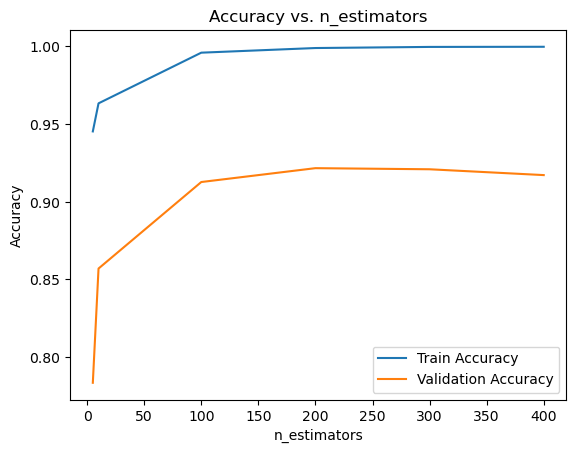

In [72]:
# Initialize lists to store hyperparameters and accuracies
nestimators = [5,10,100,200,300,400]
train_scores = []
val_scores = []

for n in nestimators:
    my_pipeline = [('model', xgb.XGBClassifier(n_estimators=n))
                    ] 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(nestimators, train_scores, label='Train Accuracy')
plt.plot(nestimators, val_scores, label='Validation Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.legend()
plt.show()

Choose the best n_estimator where the validation score id higher and closest ot the train accuracy.

In [73]:
# Find the indices where val_scores > 0.75
val_indices = np.where(np.array(val_scores) > 0.80)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_nestimators = nestimators[valid_indices]

best_nestimators

200

Optimize max_depth by comparing the accuracies over a range of values.

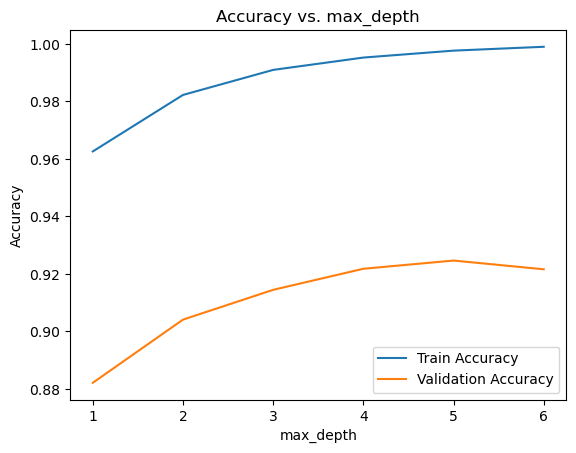

In [74]:
# Initialize lists to store hyperparameters and accuracies
max_depth = [None,1,2,3,4,5,6]
train_scores = []
val_scores = []

for d in max_depth:
    my_pipeline = [('model', xgb.XGBClassifier(n_estimators=best_nestimators, max_depth = d))
                    ] 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(max_depth, train_scores, label='Train Accuracy')
plt.plot(max_depth, val_scores, label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth')
plt.legend()
plt.show()

Choose the best max_depth where the validation score is higher and closest ot the train accuracy.

In [75]:
# Find the indices where val_scores > 0.8
val_indices = np.where(np.array(val_scores) > 0.80)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_max_depth = max_depth[valid_indices]

best_max_depth

5

Score the model with the best hyperparameter values.

In [76]:
# Create the pipeline
pipeline = Pipeline([('model', xgb.XGBClassifier(n_estimators=best_nestimators, max_depth = best_max_depth))
                    ])
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
# Predict target values on the test data
y_pred = pipeline.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 99.76
The best validation accuracy is 92.46
The best test accuracy is 92.73

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6000
           1       0.92      0.93      0.93      6000

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



<a id = "gsxgb"></a>
### 7.2. Grid search

Perform grid search to fine tune hyperparameters.

In [77]:
xgb_classifier = xgb.XGBClassifier()

# Step 2: Define hyperparameters for grid search
param_grid = {
    'max_depth': [3,4,5,6,7],  
    'n_estimators': [150,175,200,225,250]  
}

# Step 3: Perform grid search
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']

# Step 5: Create and fit the final XGBoost classifier with the best hyperparameters
final_xgb_classifier = xgb.XGBClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators)
final_xgb_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = final_xgb_classifier.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = final_xgb_classifier.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
validation_accuracy = final_xgb_classifier.score(X_validation, y_validation)
test_accuracy = final_xgb_classifier.score(X_test, y_test)

print(f'The best max_depth for XGBoost is {best_max_depth}')
print(f'The best n_estimators for XGBoost is {best_n_estimators}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best max_depth for XGBoost is 6
The best n_estimators for XGBoost is 250

The train accuracy is 99.94
The cross validation accuracy is 98.38
The validation accuracy is 92.46
The test accuracy is 92.68

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6000
           1       0.93      0.93      0.93      6000

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



In [78]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Optimal hyperparameters determined as max_depth=6 and n_estimators=250. 
- The model achieved high accuracy on the training set (99.94%) and cross-validation (98.38%), demonstrating its ability to generalize well. 
- The validation accuracy stood at 92.46%, and the model performed consistently well on the test set with an accuracy of 92.68%. - The classification report indicates balanced precision, recall, and f1-scores for both classes (spam and legitimate emails), showcasing the model's effectiveness in distinguishing between the two categories. <br>
Overall, the XGBoost model exhibited strong performance, making it a promising solution for spam email detection.

In [79]:
# Append the scores
model.append('XGBoost')
final_train_score.append(train_accuracy)
final_crossval_score.append(grid_accuracy)
final_val_score.append(val_accuracy)
final_test_score.append(test_accuracy)
final_precision.append(precision)
final_recall.append(recall)
final_f1.append(f1)

**Note:** When you set n_jobs = -1, scikit-learn will utilize all available CPU cores on your machine to perform the computations in parallel. It's worth noting that setting n_jobs = -1 is most effective when dealing with computationally intensive tasks, such as performing hyperparameter tuning with a large dataset or complex models. However, if your task is not very demanding in terms of computation, it might not provide a significant speedup. In such cases, you can set n_jobs to a specific number to control the number of CPU cores used for parallel processing. For example, n_jobs = 2 will use two CPU cores for processing.

<a id = "msc"></a>
## 8. Model Score Comparisons

Plot the accuracies, precision, recall and F1 scores to compare the models.

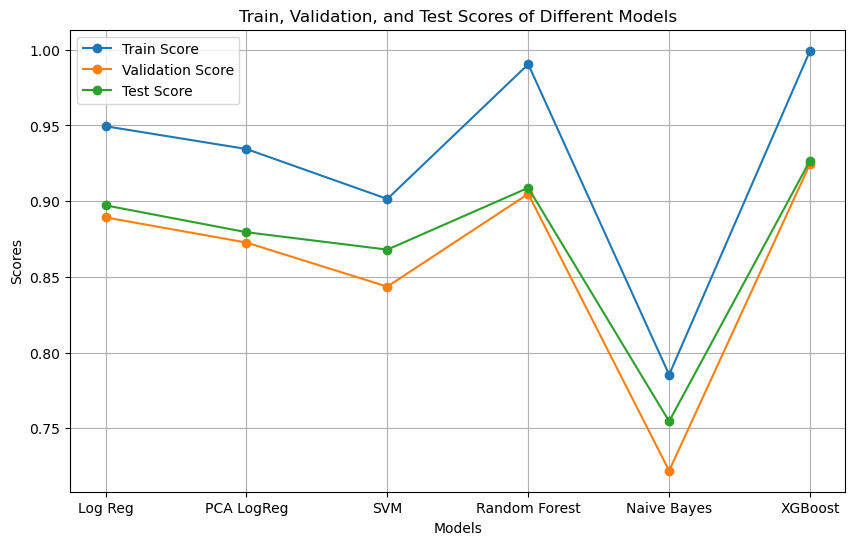

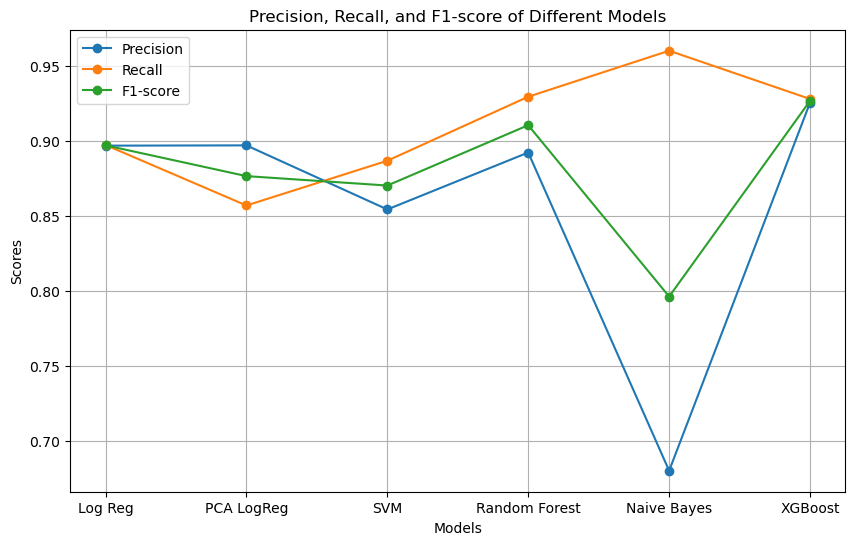

In [80]:
# Plotting train, validation, and test scores
plt.figure(figsize=(10, 6))
plt.plot(model, final_train_score, label='Train Score', marker='o')
plt.plot(model, final_val_score, label='Validation Score', marker='o')
plt.plot(model, final_test_score, label='Test Score', marker='o')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train, Validation, and Test Scores of Different Models')
plt.legend()
#plt.grid()
plt.show()

# Plotting precision, recall, and f1-score
plt.figure(figsize=(10, 6))
plt.plot(model, final_precision, label='Precision', marker='o')
plt.plot(model, final_recall, label='Recall', marker='o')
plt.plot(model, final_f1, label='F1-score', marker='o')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score of Different Models')
plt.legend()
#plt.grid()
plt.show()

<a id = "bm"></a>
## 9. Best Model

We choose the one with the best F1 score as the best model. In this case it is XGBoost.

<a id = "cm"></a>
### 9.1. Confusion Matrix

In [84]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted non-spam", "Predicted spam"],
    index=["True non-spam", "True spam"]
)

display(cf_df)

,Predicted non-spam,Predicted spam
True non-spam,5553,447
True spam,431,5569


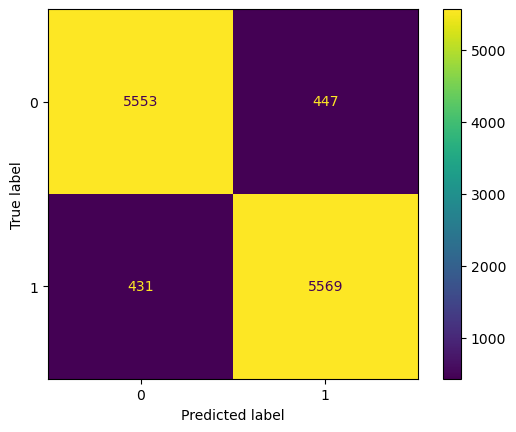

In [85]:
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

<a id = "pt"></a>
### 9.2. Probability Threshold

The probability threshold, also known as the classification threshold, is a critical parameter used in binary classification models to determine the point at which a predicted probability is considered as a positive or negative class label. In binary classification, the model assigns a probability score to each instance, indicating the likelihood of belonging to the positive class.

By default, most binary classifiers use a threshold of 0.5, meaning that any instance with a predicted probability greater than or equal to 0.5 is classified as the positive class, and any instance with a probability less than 0.5 is classified as the negative class.

However, the threshold can be adjusted to influence the trade-off between precision and recall, depending on the specific requirements of the problem at hand. Lowering the threshold (e.g., to 0.2) will classify more instances as positive, increasing recall but potentially decreasing precision. Conversely, raising the threshold (e.g., to 0.8) will classify fewer instances as positive, increasing precision but potentially decreasing recall.

Choosing an appropriate threshold depends on the specific needs of the application. For example, in spam email detection, you might want to prioritize high precision to avoid false positives (legitimate emails misclassified as spam), while in disease detection, you might prioritize high recall to minimize false negatives (actual cases of the disease missed by the model). The selection of the threshold is crucial in optimizing the model's performance for the specific task.

In [91]:
# Make probabilistic predictions (scores)
y_proba = final_xgb_classifier.predict_proba(X_test)[:,1]

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:.2f}")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:.2f}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:.2f}")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:.2f}")

Threshold of 0.5:
Precision score: 92.57
Recall score: 92.82

Threshold of 0.2:
Precision score: 87.44
Recall score: 96.43


At a lower threshold of 0.2, the model becomes more lenient in classifying emails as spam. It will now predict an email as spam if the predicted probability of being positive is greater than or equal to 0.2. As a result, the precision score decreases to 0.8744, meaning that the model has a lower percentage (87.44%) of true positive predictions among all the instances predicted as positive. However, the recall score increases to 0.9643, indicating that the model is now able to capture a higher percentage (96.43%) of the actual positive instances.

This is exactly we require in the cases of spam detection as **we don’t want non-spam emails to be predicted as spam.** So choose the best threshold with lowest Type 1 error or false positives.

In summary, by adjusting the probability threshold, we can control the trade-off between precision and recall. A higher threshold leads to higher precision but lower recall, while a lower threshold leads to higher recall but lower precision. The choice of threshold should depend on the specific requirements of the application and the importance of precision and recall in the given context.

<a id = "ar"></a>
### 9.3. AUC-ROC

The AUC-ROC provides a single scalar value that represents the overall discriminatory power of the model, regardless of the specific threshold used. It quantifies how well the model can distinguish between the positive and negative classes. Here's what the AUC value indicates:

AUC = 0.5: The model has no discriminatory power and performs as good as random guessing. It means that the TPR is equal to the FPR, and the model is unable to distinguish between the positive and negative classes.

AUC > 0.5: The model performs better than random guessing. The higher the AUC value, the better the model's ability to distinguish between the classes. An AUC of 1 indicates a perfect classifier that achieves a TPR of 1 (100% recall) without any false positives.

AUC = 1: The model is a perfect classifier, and it can completely separate the positive and negative classes without any misclassifications.

In summary, a higher AUC-ROC value indicates a better-performing model with improved discrimination between the classes. It is a widely used evaluation metric for binary classification models and helps compare different models or tuning parameters to choose the best one for a given task.

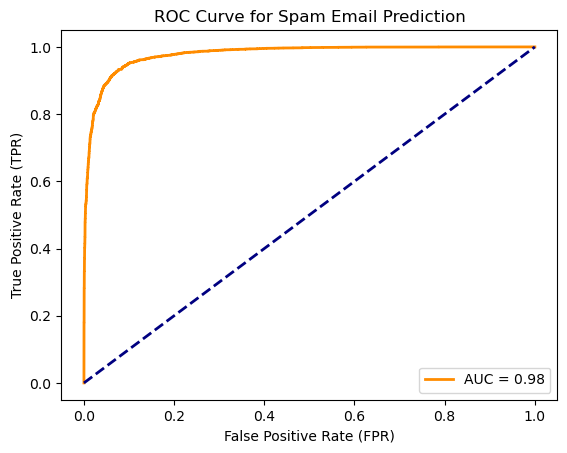

Area under curve (AUC):0.9781020555555555



In [90]:
# Plot ROC and Calculate AUC
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Spam Email Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

An Area Under the ROC Curve (AUC) of 0.98 indicates that the model's ability to discriminate between positive and negative instances is excellent. The ROC curve is a graphical representation of the model's performance at various classification thresholds, plotting the true positive rate (recall) against the false positive rate.

In this case, with an AUC of 0.98, the model achieves a high true positive rate while maintaining a low false positive rate. This means that the model correctly classifies a large proportion of positive instances (high recall) while keeping the misclassification of negative instances to a minimum (low false positive rate). This is ideal in spam detection.

An AUC of 0.98 is close to the highest possible value of 1, indicating that the model is very effective in distinguishing between the two classes. It suggests that the model's predicted probabilities for positive instances are, on average, higher than those for negative instances. Such a high AUC is often an indicator of a well-performing classifier, and it implies that the model is making highly accurate predictions on the given dataset. However, it is essential to validate the model's performance on unseen data or through cross-validation to ensure it is not overfitting to the training set.

We will continue modeling with Neural networks in the next notebook. Please refer Neural_Networks.ipynb.